# Creating a Filter, Edge Detection

### Import resources and display image

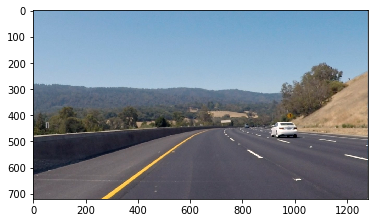

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('images/curved_lane.jpg')

plt.imshow(image)

### Convert the image to grayscale

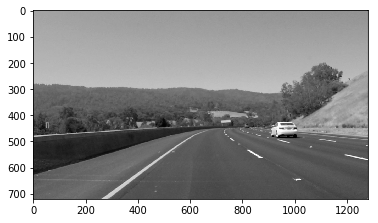

In [3]:
# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

### TODO: Create a custom kernel

Below, you've been given one common type of edge detection filter: a Sobel operator.

The Sobel filter is very commonly used in edge detection and in finding patterns in intensity in an image. Applying a Sobel filter to an image is a way of **taking (an approximation) of the derivative of the image** in the x or y direction, separately. The operators look as follows.

<img src="images/sobel_ops.png" width=200 height=200>

**It's up to you to create a Sobel x operator and apply it to the given image.**

For a challenge, see if you can put the image through a series of filters: first one that blurs the image (takes an average of pixels), and then one that detects the edges.

gray
 [[ 53  52  29 ...,  33  50  53]
 [ 55  33  98 ...,  88  34  54]
 [ 43  73 154 ..., 141  69  46]
 ..., 
 [ 47  55 100 ...,  67  87 130]
 [ 52  36  68 ...,  81 113 142]
 [ 51  55  37 ..., 113 138 135]]
filter
 [[ 74  81 102 ...,  94  76  70]
 [ 78  85 103 ...,  95  79  74]
 [ 92  96 110 ..., 101  89  86]
 ..., 
 [ 67  69  76 ...,  91  96  97]
 [ 61  64  73 ...,  93 100 102]
 [ 59  62  72 ...,  94 101 103]]


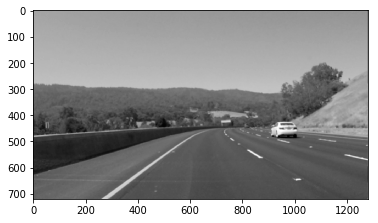

In [39]:
# Create a custom kernel

# 3x3 array for edge detection
sobel_y = np.array([[ -1, -2, -1], 
                   [ 0, 0, 0], 
                   [ 1, 2, 1]])

## TODO: Create and apply a Sobel x operator
sobel_x = np.array([[-1, 0, 1],
                   [-2, 0, 2],
                   [-1, 0, 1]])

decimal = np.array([[1, 2, 3],
                   [4, 5, 6],
                   [7, 8, 9]])

blur_5 = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]])

blur_5 = blur_5 / 25

# Filter the image using filter2D, which has inputs: (grayscale image, bit-depth, kernel)  
filtered_image = cv2.filter2D(gray, -1, blur_5)

#filtered_image = cv2.blur(gray, (5,5))

print('gray\n', gray)
print('filter\n', filtered_image)
#plt.imshow(gray, cmap='gray')
plt.imshow(filtered_image, cmap='gray')

### Test out other filters!

You're encouraged to create other kinds of filters and apply them to see what happens! As an **optional exercise**, try the following:
* Create a filter with decimal value weights.
* Create a 5x5 filter 

5x5 filter effect a little change for this. The filter size need to be bigger if we wanna look a lot of change on this
* Apply your filters to the other images in the `images` directory.



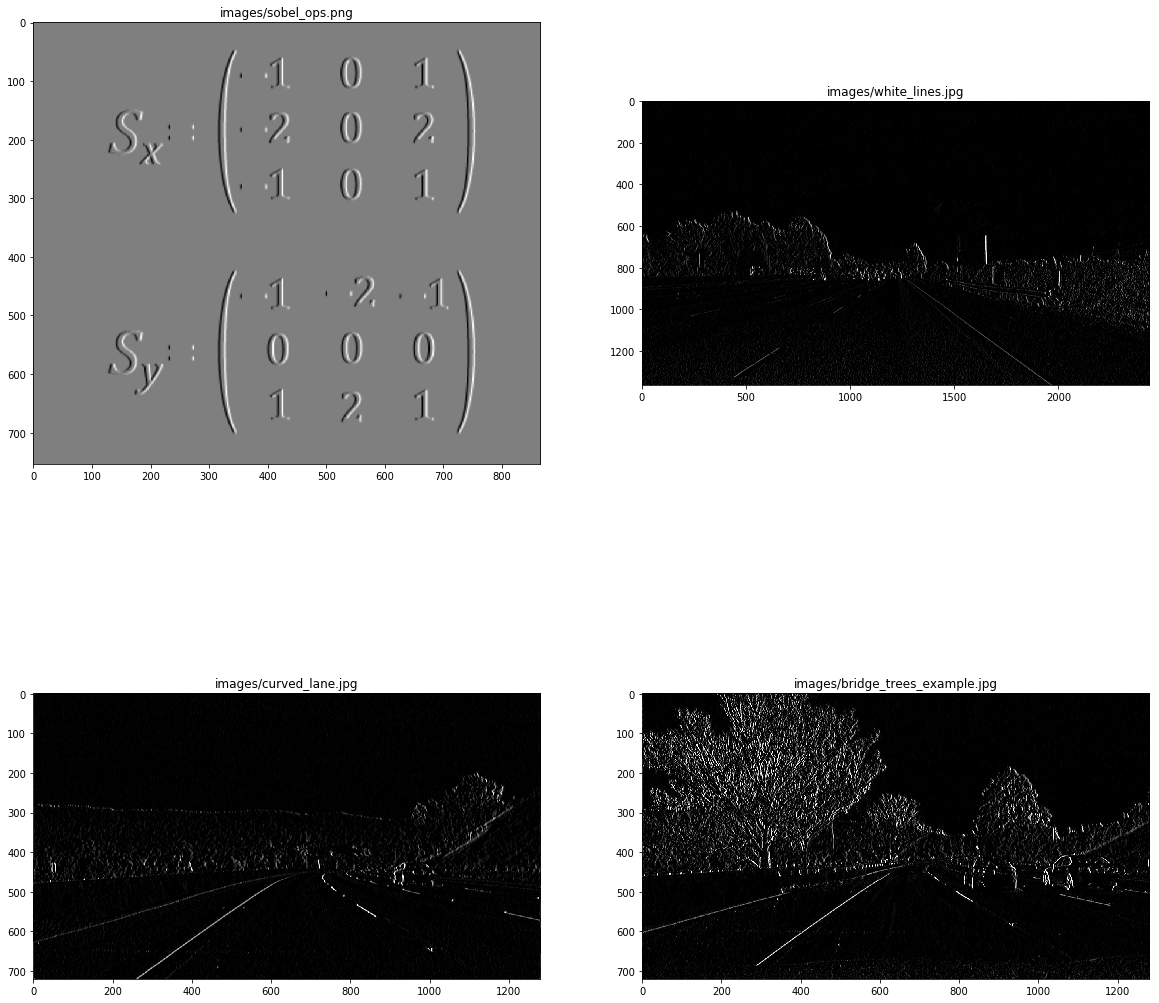

In [52]:
import os
import glob # library for loading images from a directory

im_list = []
im_name_list = []

for file in glob.glob(os.path.join('images', "*")):
    im = mpimg.imread(file)
    im_list.append(im)
    im_name_list.append(file)
    
gray_list = []
for image in im_list:
    g_im = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    gray_list.append(g_im)
    
filter_list = []
for image in gray_list:
    f_im = cv2.filter2D(image, -1, sobel_x)
    filter_list.append(f_im)

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(20, 20))
ax1.set_title(im_name_list[0])
ax1.imshow(filter_list[0], cmap='gray')
ax2.set_title(im_name_list[1])
ax2.imshow(filter_list[1], cmap='gray')
ax3.set_title(im_name_list[2])
ax3.imshow(filter_list[2], cmap='gray')
ax4.set_title(im_name_list[3])
ax4.imshow(filter_list[3], cmap='gray')
